In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from scipy import stats

#load dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

#preview
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.loc[2]

age                             65.0
anaemia                          0.0
creatinine_phosphokinase       146.0
diabetes                         0.0
ejection_fraction               20.0
high_blood_pressure              0.0
platelets                   162000.0
serum_creatinine                 1.3
serum_sodium                   129.0
sex                              1.0
smoking                          1.0
time                             7.0
DEATH_EVENT                      1.0
Name: 2, dtype: float64

In [4]:
df.iloc[3:5]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1


In [5]:
df.sort_values('age',ascending=True)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
269,40.0,0,582,1,35,0,222000.00,1.00,132,1,0,244,0
248,40.0,0,624,0,35,0,301000.00,1.00,142,1,1,214,0
232,40.0,1,129,0,35,0,255000.00,0.90,137,1,0,209,0
242,40.0,0,90,0,35,0,255000.00,1.10,136,1,1,212,0
206,40.0,1,101,0,40,0,226000.00,0.80,141,0,0,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,90.0,1,337,0,38,0,390000.00,0.90,144,0,0,256,0
36,90.0,1,60,1,50,0,226000.00,1.00,134,1,0,30,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1


In [6]:
df.groupby('serum_creatinine').mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking,time,DEATH_EVENT
serum_creatinine,,,,,,,,,,,,
0.50,50.000000,0.000000,2522.000000,0.000000,30.000000,1.000000,404000.000000,139.000000,0.000000,0.000000,214.000000,0.000000
0.60,61.250000,0.500000,493.500000,0.500000,41.500000,0.500000,275750.000000,135.250000,0.750000,0.750000,85.000000,0.500000
0.70,55.263158,0.421053,432.263158,0.315789,40.947368,0.315789,259736.842105,137.263158,0.736842,0.473684,148.578947,0.052632
0.75,60.000000,0.000000,96.000000,1.000000,38.000000,0.000000,228000.000000,140.000000,0.000000,0.000000,95.000000,0.000000
0.80,53.458333,0.375000,444.583333,0.375000,40.583333,0.375000,276708.333333,137.166667,0.541667,0.208333,154.291667,0.041667
0.90,59.125000,0.468750,666.250000,0.375000,39.593750,0.468750,256593.750000,138.437500,0.562500,0.281250,137.406250,0.156250
1.00,59.853340,0.540000,843.720000,0.580000,39.120000,0.440000,273267.160600,137.500000,0.600000,0.240000,134.080000,0.300000
1.10,61.187500,0.437500,776.718750,0.250000,38.937500,0.281250,255922.878750,138.843750,0.843750,0.437500,137.750000,0.281250
1.18,59.454545,0.181818,1000.727273,0.272727,45.272727,0.272727,251020.206364,137.454545,0.636364,0.454545,120.363636,0.000000


In [7]:
df['serum'] = df['serum_creatinine'] + df['serum_sodium']
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,serum
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,131.9
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,137.1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,130.3
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,138.9
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,118.7


In [8]:
df[['serum_creatinine','serum_sodium']]

,serum_creatinine,serum_sodium
0,1.9,130
1,1.1,136
2,1.3,129
3,1.9,137
4,2.7,116
...,...,...
294,1.1,143
295,1.2,139
296,0.8,138
297,1.4,140


In [9]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
serum                       0
dtype: int64

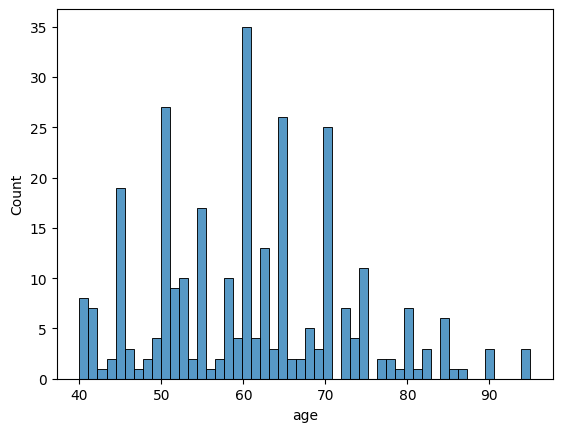

In [12]:
import matplotlib.pyplot as plt
sns.histplot(data=df, x='age', bins=50)
plt.show()

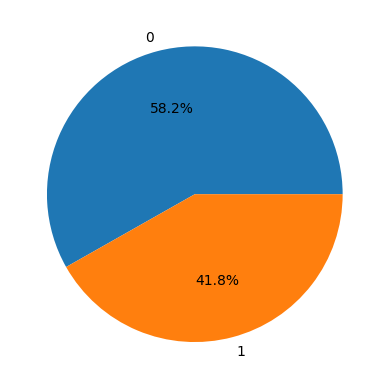

In [13]:
df['diabetes'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()


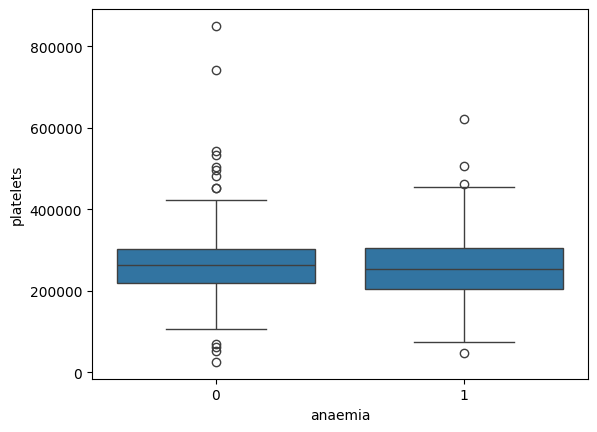

In [14]:
sns.boxplot(x='anaemia', y='platelets', data=df)
plt.show()


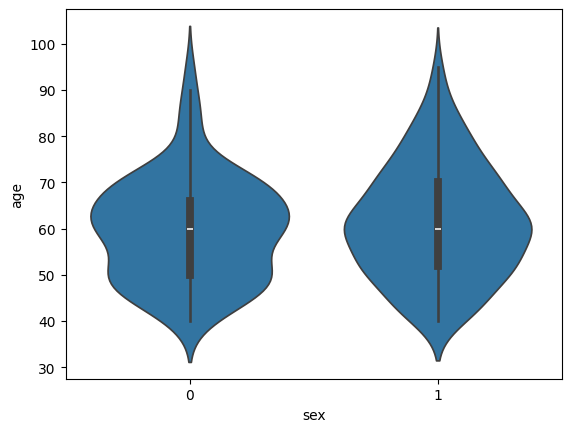

In [15]:
sns.violinplot(x='sex', y='age', data=df)
plt.show()

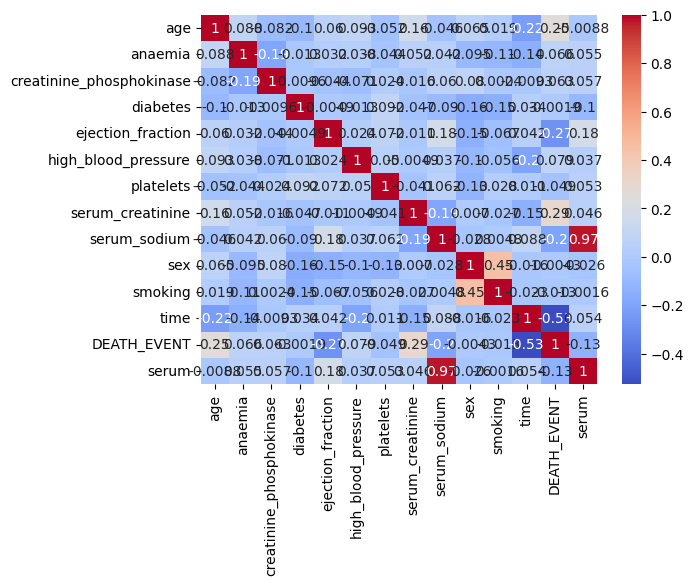

In [16]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

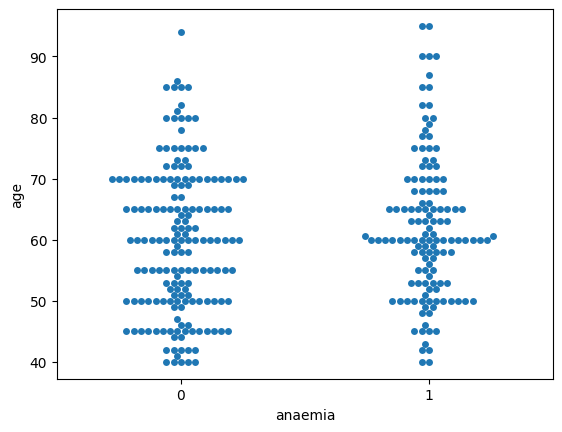

In [17]:
sns.swarmplot(x='anaemia', y='age', data=df)
plt.show()

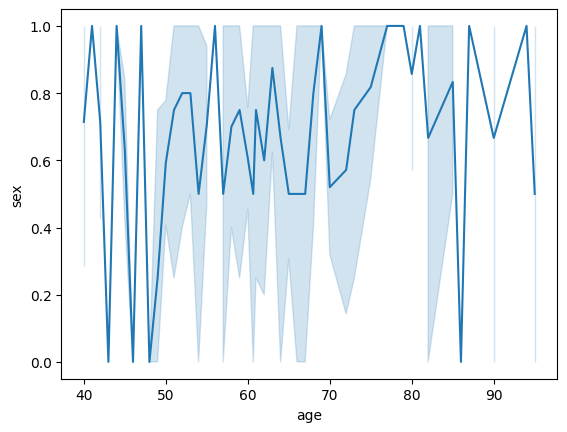

In [18]:
sns.lineplot(x='age', y='sex', data=df)
plt.show()

In [19]:
z_scores = np.abs(stats.zscore(df['platelets']))
outliers_z = df[z_scores > 3]
print(outliers_z.shape)

(3, 14)


In [20]:
z_scores

array([1.68164843e-02, 7.53566018e-09, 1.03807313e+00, 5.46474088e-01,
       6.51798584e-01, 6.07923969e-01, 1.39653077e+00, 1.95248772e+00,
       7.53566018e-09, 1.27653904e+00, 1.07170610e+00, 1.06083277e-01,
       1.30435595e+00, 1.29474599e-01, 1.67596326e+00, 2.21586251e+00,
       1.39084560e-02, 9.97106546e-01, 2.69949625e-01, 1.80619664e+00,
       1.29474599e-01, 3.44549181e-01, 2.62616007e-01, 1.07170610e+00,
       7.53566018e-09, 1.17121454e+00, 6.89857143e-01, 2.11407773e-01,
       1.13024795e+00, 6.48890556e-01, 7.53566018e-09, 9.89772928e-01,
       5.69865410e-01, 3.95757415e-01, 7.71790317e-01, 3.62124446e-01,
       3.82607740e-01, 5.90348704e-01, 4.26482355e-01, 6.72281878e-01,
       7.53566018e-09, 1.13024795e+00, 8.02515258e-01, 4.64540914e-01,
       7.10340437e-01, 4.77690589e-01, 7.82663649e-02, 1.92176278e+00,
       1.26338936e+00, 1.34823057e+00, 9.97106546e-01, 1.58378844e+00,
       7.53566018e-09, 8.97598107e-01, 8.55999835e-02, 2.02417925e+00,
      

In [21]:
Q1 = df['platelets'].quantile(0.25)
Q3 = df['platelets'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['platelets'] < lower_bound) | 
(df['platelets'] > upper_bound)]
print(outliers_iqr.shape)


(21, 14)


In [22]:
outliers_iqr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,serum
7,60.0,1,315,1,60,0,454000.0,1.10,131,1,1,10,1,132.10
15,82.0,1,379,0,50,0,47000.0,1.30,136,1,0,13,1,137.30
47,60.0,0,582,1,38,1,451000.0,0.60,138,1,1,40,1,138.60
55,95.0,1,371,0,30,0,461000.0,2.00,132,1,0,50,1,134.00
69,65.0,0,113,1,25,0,497000.0,1.83,135,1,0,67,1,136.83
105,72.0,1,328,0,30,1,621000.0,1.70,138,0,1,88,1,139.70
109,45.0,0,292,1,35,0,850000.0,1.30,142,1,1,88,0,143.30
117,85.0,1,102,0,60,0,507000.0,3.20,138,0,0,94,0,141.20
162,63.0,1,582,0,40,0,448000.0,0.90,137,1,1,123,0,137.90
163,50.0,1,2334,1,35,0,75000.0,0.90,142,0,0,126,1,142.90


In [23]:
df_log = df.copy()
df_log['platelets'] = np.log(df_log['platelets'] + 1)

In [24]:
df_log

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,serum
0,75.0,0,582,0,20,1,12.487489,1.9,130,1,0,4,1,131.9
1,55.0,0,7861,0,38,0,12.481274,1.1,136,1,0,6,1,137.1
2,65.0,0,146,0,20,0,11.995358,1.3,129,1,1,7,1,130.3
3,50.0,1,111,0,20,0,12.254868,1.9,137,1,0,7,1,138.9
4,65.0,1,160,1,20,0,12.697719,2.7,116,0,0,8,1,118.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,11.951187,1.1,143,1,1,270,0,144.1
295,55.0,0,1820,0,38,0,12.506181,1.2,139,0,0,271,0,140.2
296,45.0,0,2060,1,60,0,13.517106,0.8,138,0,0,278,0,138.8
297,45.0,0,2413,0,38,0,11.849405,1.4,140,1,1,280,0,141.4


In [25]:
df_removed = df[(df['platelets'] >= lower_bound) & (df['platelets'] <= upper_bound)]
print(df_removed.shape)

(278, 14)


In [26]:
df_removed

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,serum
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,131.9
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,137.1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,130.3
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,138.9
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,118.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,270,0,136.9
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,144.1
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,140.2
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,141.4


In [27]:
df_capped = df.copy()
df_capped['platelets'] = np.where(df_capped['platelets'] > upper_bound, upper_bound, 
                                  np.where(df_capped['platelets'] < lower_bound, lower_bound, df_capped['platelets']))

In [28]:
df_capped

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,serum
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,131.9
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,137.1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,130.3
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,138.9
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,118.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,144.1
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,140.2
296,45.0,0,2060,1,60,0,440000.00,0.8,138,0,0,278,0,138.8
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,141.4


In [29]:
df_imp = df.copy()
median_value = df['platelets'].median()
df_imp.loc[(df_imp['platelets'] > upper_bound) | 
(df_imp['platelets'] < lower_bound), 
'platelets'] = median_value


In [30]:
df_imp

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,serum
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,131.9
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,137.1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,130.3
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,138.9
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,118.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,144.1
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,140.2
296,45.0,0,2060,1,60,0,262000.00,0.8,138,0,0,278,0,138.8
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,141.4


In [31]:
df.to_csv('output.csv', index=False)

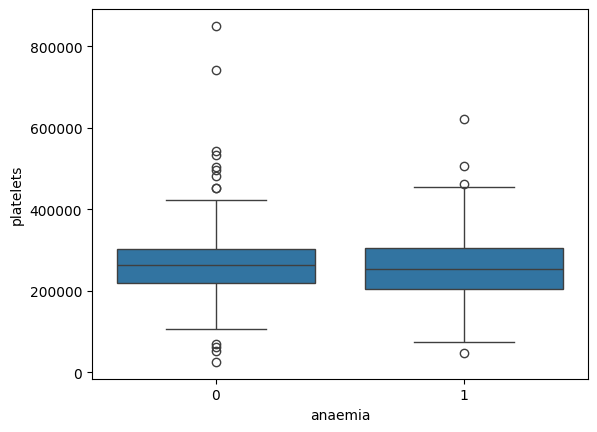

In [32]:
sns.boxplot(x='anaemia', y='platelets', data=df)
plt.show()